# Data Collection and Cleaning


In [ ]:

import pandas as pd


df = pd.read_csv("C:\\Users\\saire\\OneDrive\\Desktop\\Git\\Data\\archive\\Telco_churn.csv")

print(df.columns)

df.dropna(inplace=True)
df = df[df['tenure'] > 0]
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

df.drop(columns=['customerID'], inplace=True)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Exploratory Data Analysis (EDA)


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000


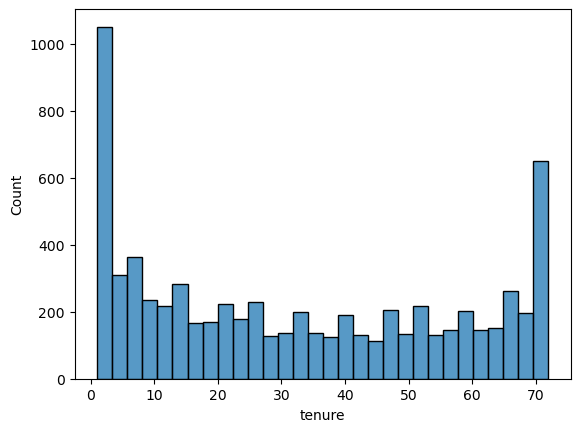

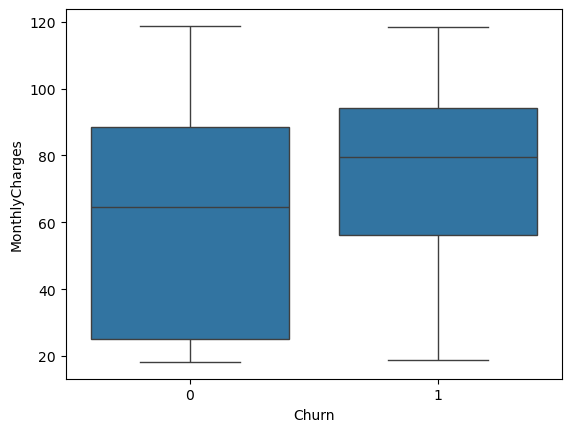

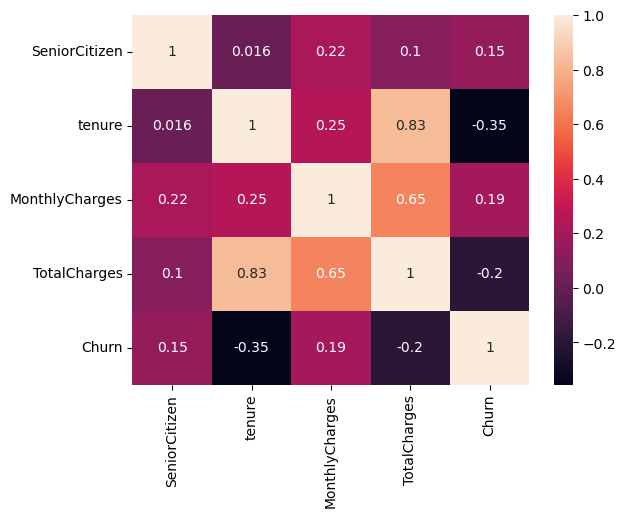

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print(df.describe())

sns.histplot(df['tenure'], bins=30)
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Feature ENgineering

In [ ]:
import pandas as pd

columns_to_encode = ['gender', 'InternetService', 'Contract']

missing_columns = [col for col in columns_to_encode if col not in df.columns]
if missing_columns:
    print(f"The following columns are missing and will be skipped: {missing_columns}")


existing_columns_to_encode = [col for col in columns_to_encode if col in df.columns]
df = pd.get_dummies(df, columns=existing_columns_to_encode)

# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()



In [ ]:

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


# Statistical Analysis

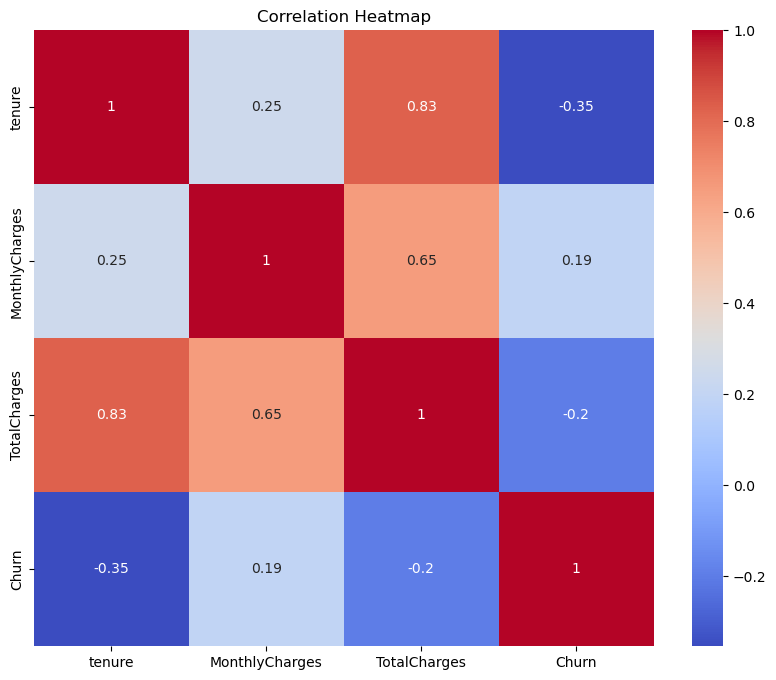

T-test: stat=31.741289063447656, p=9.437650217574845e-207
Linear Regression Coefficients: [-0.18894744  0.13183907]
Logistic Regression Coefficients: [[-1.34781078  0.98752157]]


In [ ]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # You can change 'coolwarm' to other colormaps like 'viridis', 'plasma', 'inferno', etc.
plt.title('Correlation Heatmap')
plt.show()

# Hypothesis testing
stat, p = stats.ttest_ind(df[df['Churn'] == 0]['tenure'], df[df['Churn'] == 1]['tenure'])
print(f'T-test: stat={stat}, p={p}')

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(df[['tenure', 'MonthlyCharges']], df['Churn'])
print(f'Linear Regression Coefficients: {lin_reg.coef_}')

# Logistic regression
log_reg = LogisticRegression()
log_reg.fit(df[['tenure', 'MonthlyCharges']], df['Churn'])
print(f'Logistic Regression Coefficients: {log_reg.coef_}')


# Predictive Modelling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, log_loss


X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import numpy as np
y_random = np.random.choice([0, 1], size=y_test.shape)
print(f'Worst-case log-loss: {log_loss(y_test, y_random)}')


log_reg = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))
print(f'Logistic Regression AUC-ROC: {roc_auc_score(y_test, y_pred_log_reg)}')

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(f'Decision Tree AUC-ROC: {roc_auc_score(y_test, y_pred_dt)}')

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(f'Random Forest AUC-ROC: {roc_auc_score(y_test, y_pred_rf)}')

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print(f'Gradient Boosting AUC-ROC: {roc_auc_score(y_test, y_pred_gb)}')

# SVM with hyperparameter tuning
svm = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(f'SVM AUC-ROC: {roc_auc_score(y_test, y_pred_svm)}')

# Neural Network
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print(classification_report(y_test, y_pred_nn))
print(f'Neural Network AUC-ROC: {roc_auc_score(y_test, y_pred_nn)}')


Worst-case log-loss: 17.34296612966049
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Logistic Regression AUC-ROC: 0.7013902190287361
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.46      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.71      1407

Decision Tree AUC-ROC: 0.6421771383903381
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407

# Model Comparsion

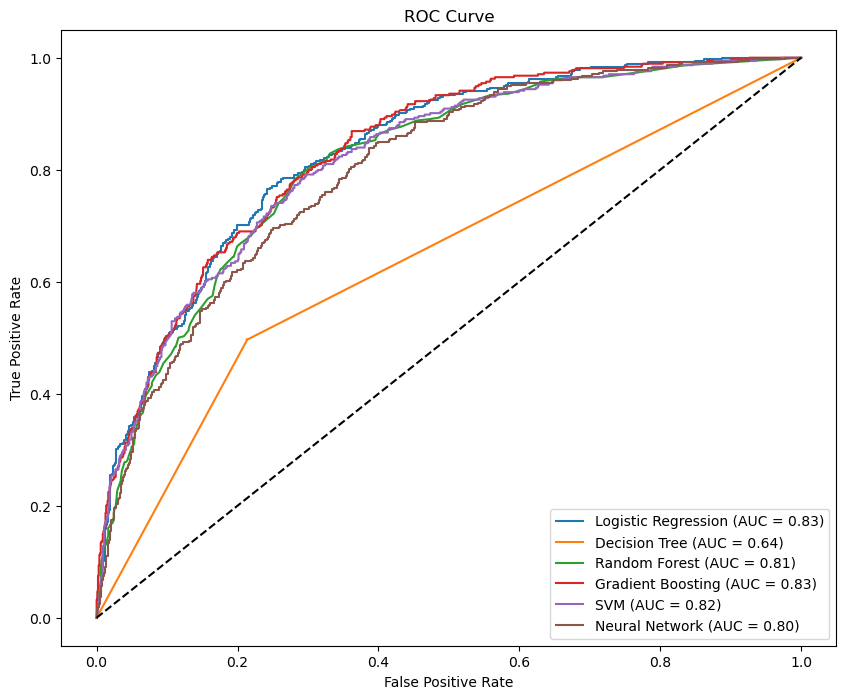

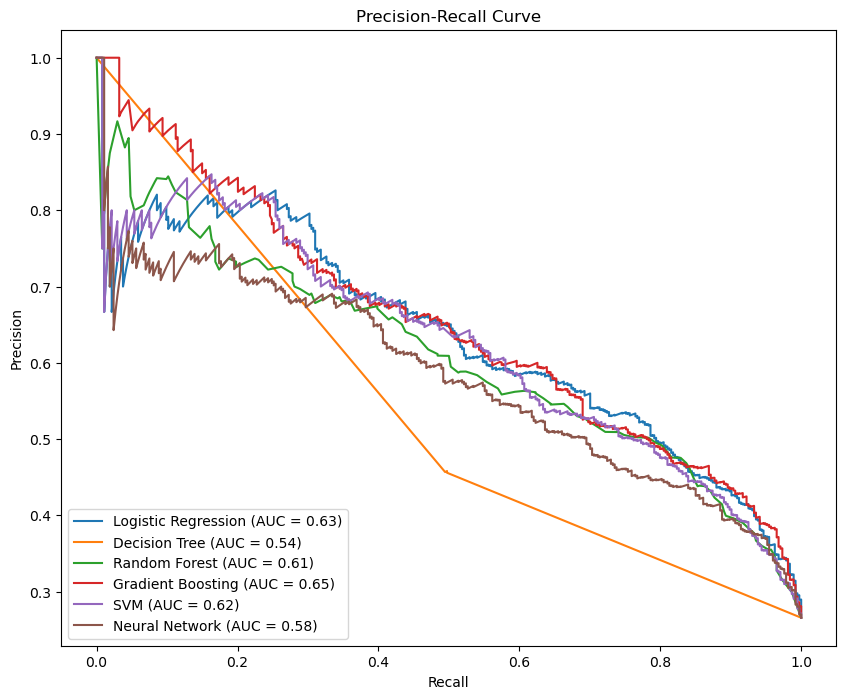

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# List of trained models
models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'SVM': best_svm,
    'Neural Network': nn
}

# Plot ROC and Precision-Recall curves
plot_roc_curve(models, X_test, y_test)
plot_precision_recall_curve(models, X_test, y_test)


# importance of features for tree-based models like Random Forest and Gradient Boosting.

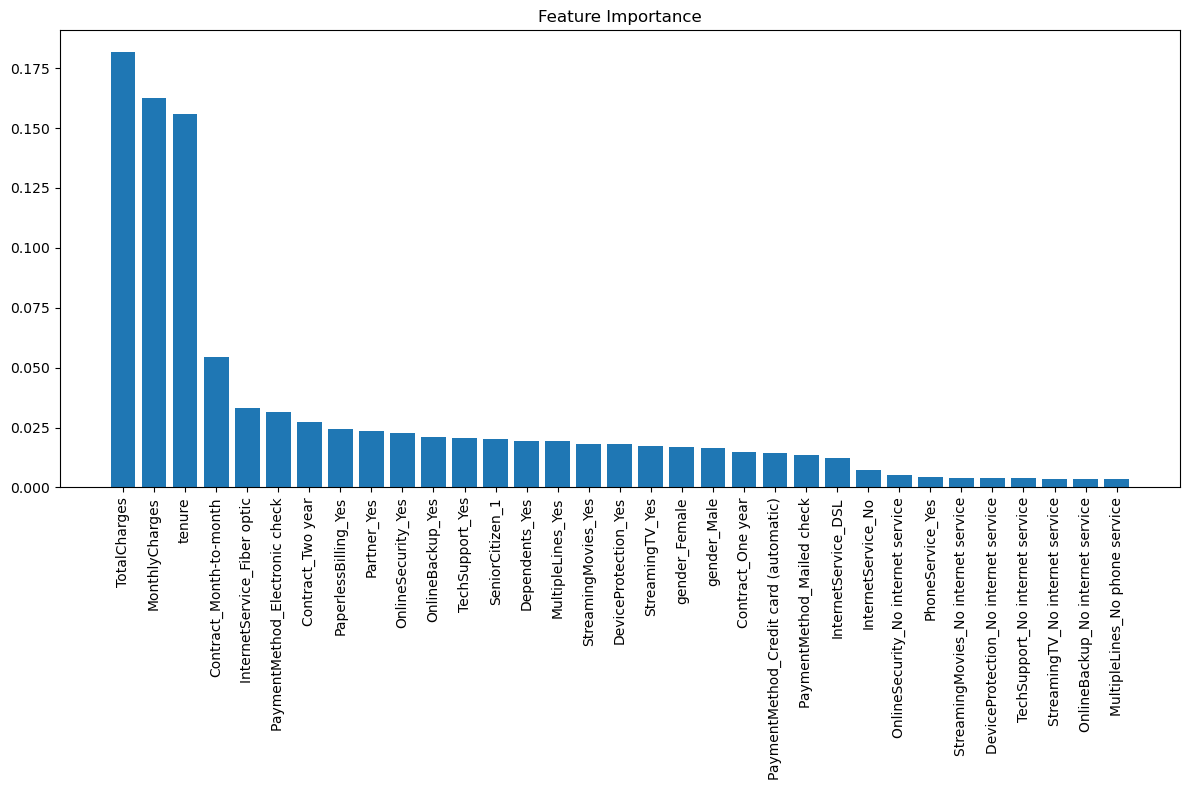

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

#  feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


# confusion matrix for the Random Forest model.

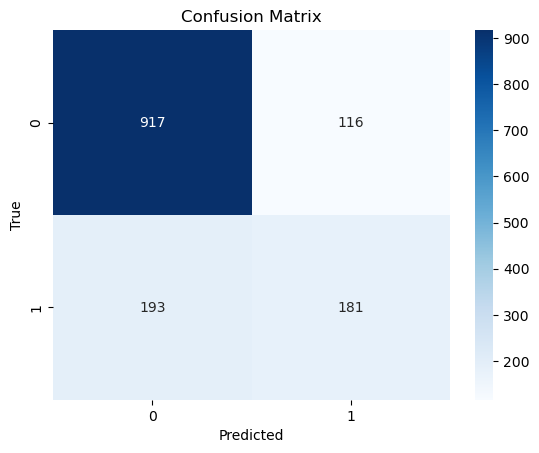

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#  confusion matrix for the Support vector Machine (SVM) Model.

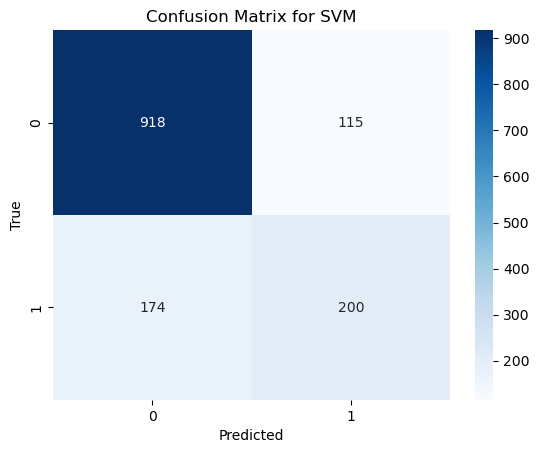

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_svm = best_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


#   confusion matrix for the Gradient Boosting Model.

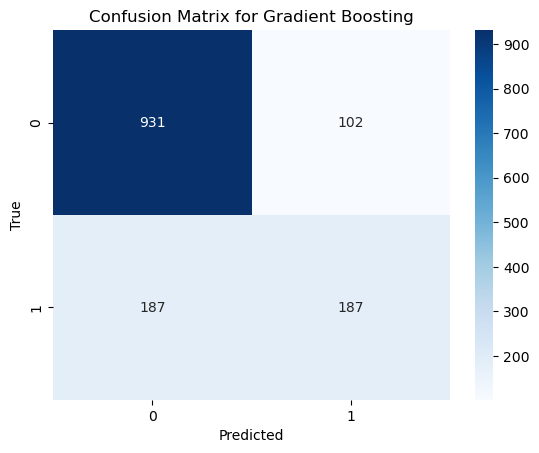

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_gb = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


#  confusion matrix for the Logistics Regression  Model.

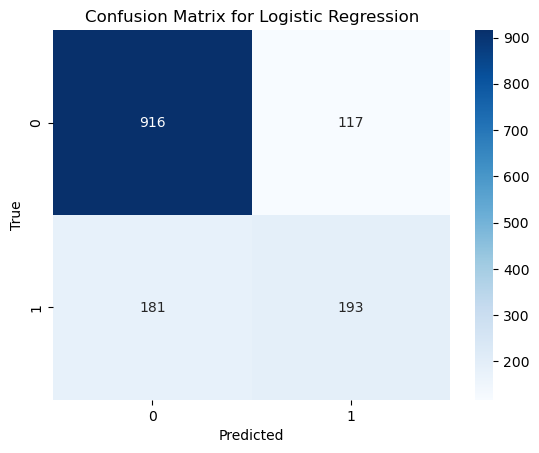

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_log_reg = best_log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
